# Exercise 3

##### The date of downloading the data: 00:38,Sep19th, 2022
##### Data Source: The New York Times

In [565]:
data_nytimes= pd.read_csv('./us-states.csv')

In [524]:
#grouping dataframe into different values in the dictionary 

In [566]:
state_datasets=[]
for k in (pd.unique(data_nytimes['state'])):
        state_data=data_nytimes[data_nytimes['state']==k]
        state_datasets.append(state_data)
dict_state=dict(zip(pd.unique(data_nytimes['state']), state_datasets))

In [525]:
#Calculating new cases for each

In [568]:
for key in dict_state.keys():
    cases=list(dict_state[key]['cases'])
    old_cases=[0]+cases
    new_cases = []
    for today,yesterday in zip(cases, old_cases):
        new_cases.append(today-yesterday)
    dict_state[key]['new_cases']=new_cases

In [532]:
#Concatenate values in the dictionary back with State sorted and new_cases values calculated

In [570]:
data_sorted=pd.concat(dict_state.values()) 

##### function for new cases vs date

In [574]:
def newcases_vs_date(state_list):
    data_sorted_state=data_sorted[data_sorted['state'].isin(state_list)]
    plot=(ggplot(data_sorted_state, aes(x='date', y='new_cases',color = 'state',group=1))
          +geom_line()
          + scale_x_date(date_labels='%Y-%m-%d')
          + theme_xkcd())
    return plot

##### limitations: if the function takes on a list of states in which the number exceed the legen limit, there maybe same colors representing different states in the legend.

##### test the above function:

##### example 1: plotting for all states in the orginal dataset

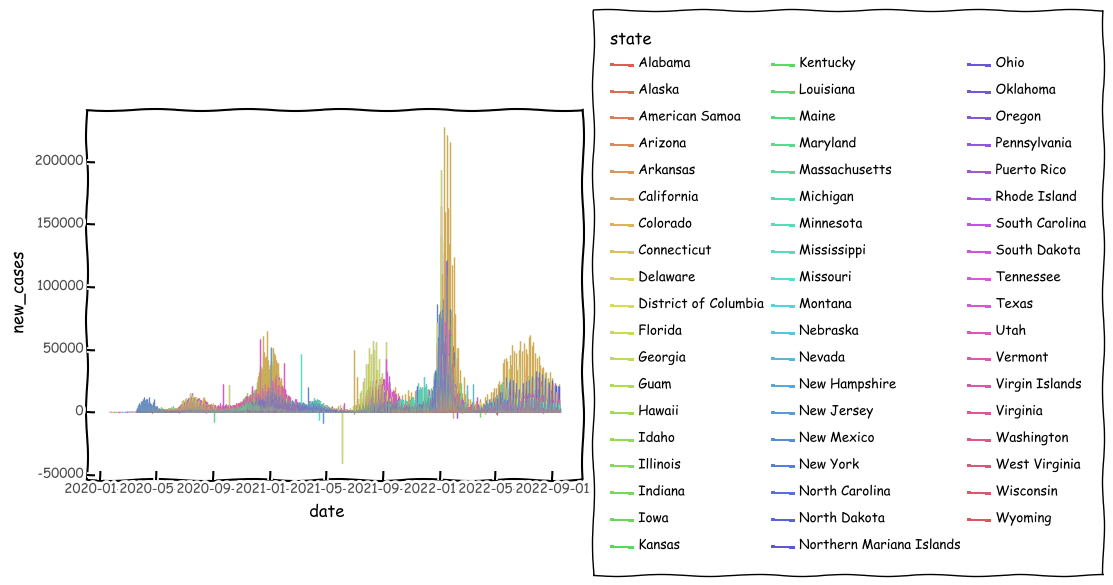

<ggplot: (8772837118468)>

In [575]:
newcases_vs_date(data_sorted['state'])

##### example 2: plotting for only Alaska and California

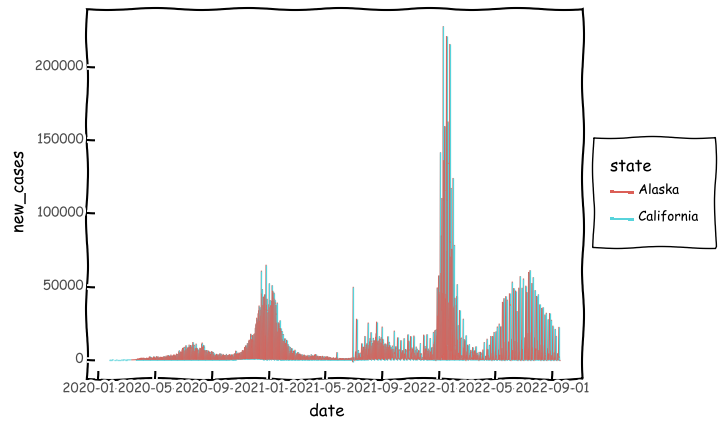

<ggplot: (8772837091271)>

In [576]:
newcases_vs_date(['Alaska','California'])

##### function that takes the name of the state and returns the date of its highest number of new cases

In [592]:
def date_higest_newcase_number(state):
    index=data_sorted[data_sorted['state']==state]['new_cases'].idxmax()
    date=data_sorted['date'].loc[index]
    return print(f'date of the highest number of new cases in {state}: {date}')

In [597]:
def date_higest_newcase_number(state):
    index=data_sorted[data_sorted['state']==state]['new_cases'].idxmax()
    date=data_sorted['date'].loc[index]
    return date

##### test

In [593]:
date_higest_newcase_number('Alaska')#as shown above of the peak for Alaska in the ggplot

date of the highest number of new cases in Alaska: 2022-01-19


In [613]:
date_higest_newcase_number('Alaska')

'2022-01-19'

##### function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak

In [632]:
from dateutil.parser import parse as parse_date

In [638]:
def days_between_peaks(state1,state2):
    state1highest=date_higest_newcase_number(state1)
    state2highest=date_higest_newcase_number(state2)
    days_between_peaks=parse_date(state1highest)-parse_date(state2highest)
    days_between_peaks=abs(days_between_peaks.days)
    if state1highest < state2highest:
        return print(f'{state1} had the highest number of daily new cases first, and there are {days_between_peaks} days separating {state1} peak from {state2} peak.')
    elif state1highest > state2highest:
        return print(f'{state2} had the highest number of daily new cases first, and there are {days_between_peaks} days separating {state1} peak from {state2} peak.')
    else:
        return print(f'{state1} and {state2} have the highest number of daily new cases on the same date.')

##### test with examples from Florida and Alaska

In [607]:
date_higest_newcase_number('Florida')

'2022-01-04'

In [637]:
date_higest_newcase_number('Alaska')

'2022-01-19'

In [640]:
days_between_peaks('Florida','Alaska')

Florida had the highest number of daily new cases first, and there are 15 days separating Florida peak from Alaska peak.
